In [1]:
%matplotlib inline
import pandas
import numpy
import matplotlib.pyplot as plt

In [2]:
from figures import JobTimePlots

# Read Simulation Time Data

In [3]:
sim_out_data = pandas.read_csv("data/simulation/out.txt")
sim_out_data.columns = [i.replace(" ", "") for i in sim_out_data.columns]
sim_out_data.head()

,JobName,Success,Timestart,timeschedule,TimestartExec,TimeEndExec,Tier,Type
0,141647926,1,861,1000.011346,1000.011357,1172.301357,NIKHEF-ELPROD,MCStripping
1,141647872,1,717,1000.013122,1000.013132,1298.893132,RAL-LCG2,MCStripping
2,141647925,1,860,1000.013479,1000.013587,1424.063587,RU-RDIG,MCStripping
3,141647995,1,1217,2000.011271,2000.011478,2267.721478,CERN-PROD,MCStripping
4,141648046,1,1458,2000.011510,2000.011521,2320.031521,FZK-LCG2,MCStripping


# Read Real Time Data

In [4]:
real_out_data = pandas.read_csv('data/real/real_out.txt')
is_not_none = (real_out_data.values != 'None').cumprod(axis=1)[:, -1]
real_out_data = real_out_data.iloc[is_not_none == 1]
real_out_data.head()

,JobName,SubmissionTime,StartExecTime,EndExecTime,WallClockTime,TotalCPUTime,JobType,Tier
0,141688832,1475309580,1475310044.0,1475347814.0,37757.996412,33339.05,DataStripping,RAL-LCG2
1,141688833,1475309581,1475310048.0,1475346524.0,36464.665066,34800.88,DataStripping,RAL-LCG2
2,141688834,1475309581,1475310136.0,1475346309.0,36154.8810921,33842.75,DataStripping,RAL-LCG2
3,141688835,1475309581,1475310057.0,1475349440.0,39369.956562,37084.31,DataStripping,RAL-LCG2
4,141688836,1475309581,1475310335.0,1475349830.0,39478.106035,38007.07,DataStripping,RAL-LCG2


# Job Time Plots

In [5]:
jtp = JobTimePlots(sim_out_data, real_out_data)

### Job Submission Time Plot

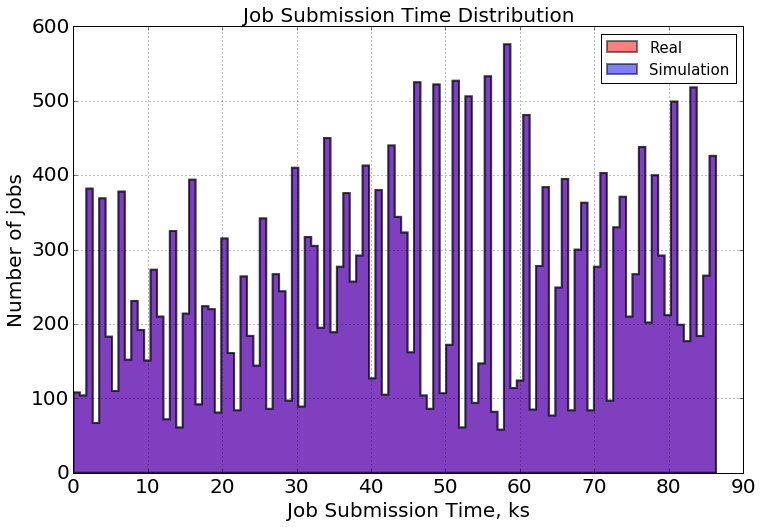

In [6]:
jtp.job_submission_time()

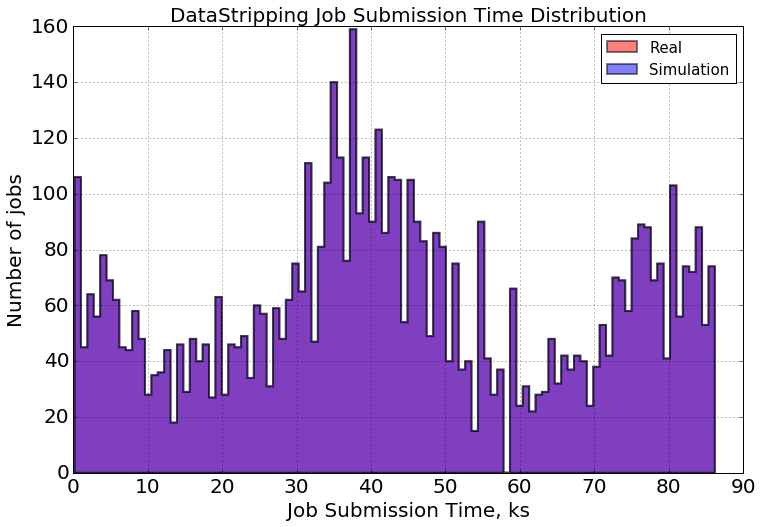

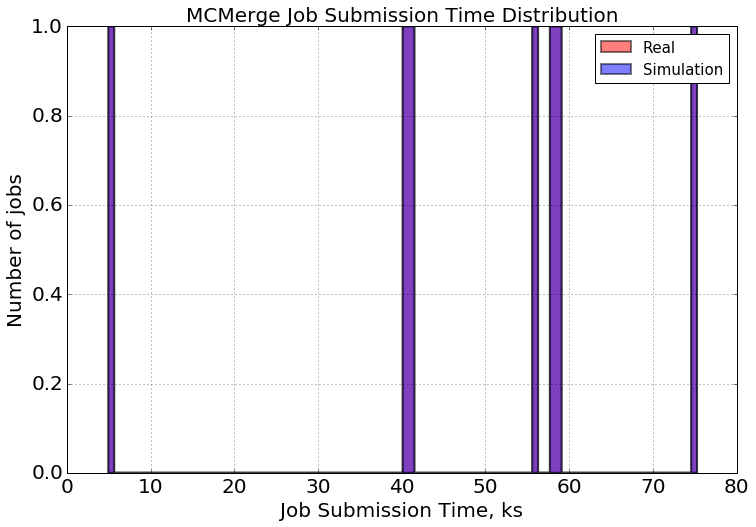

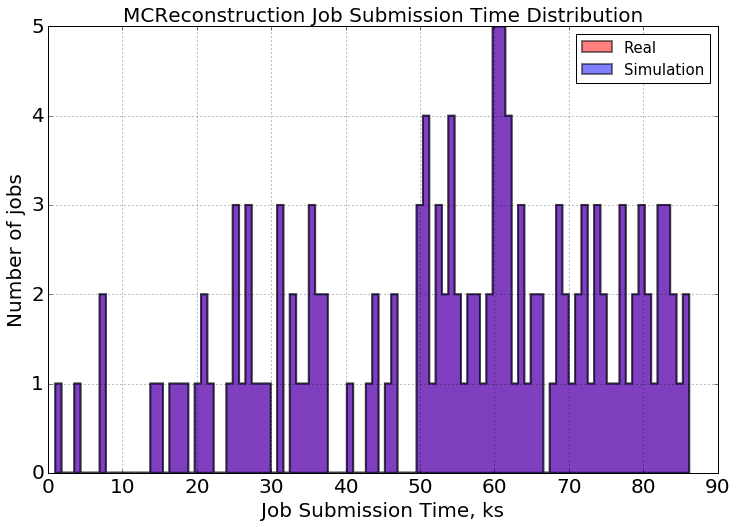

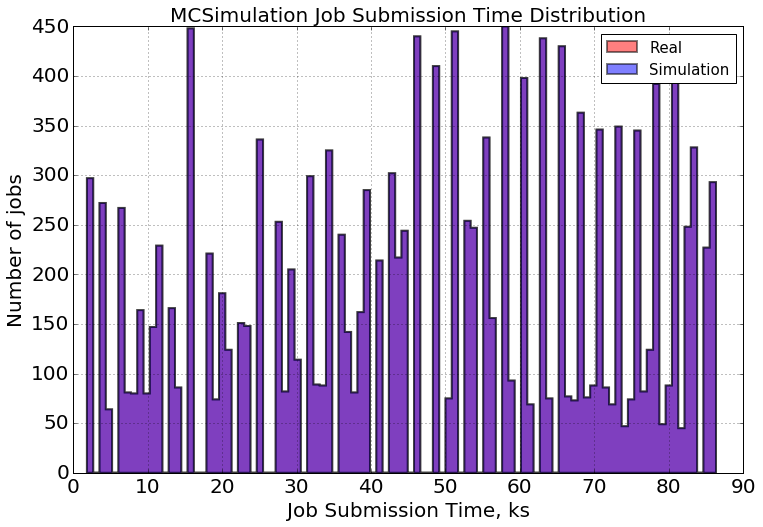

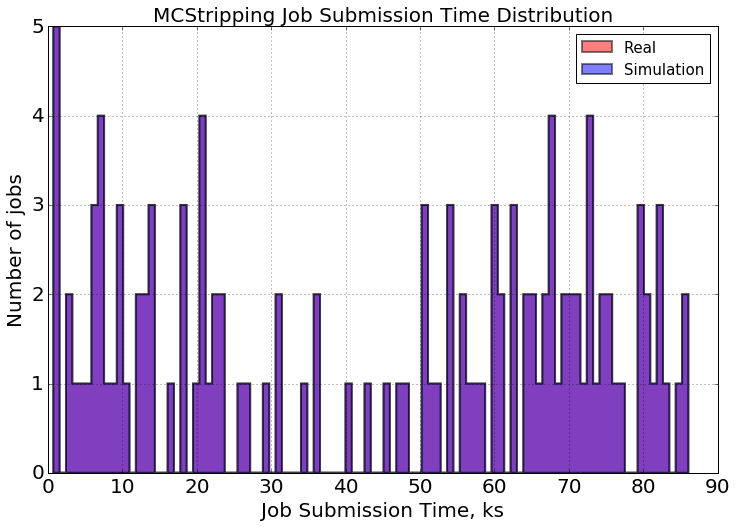

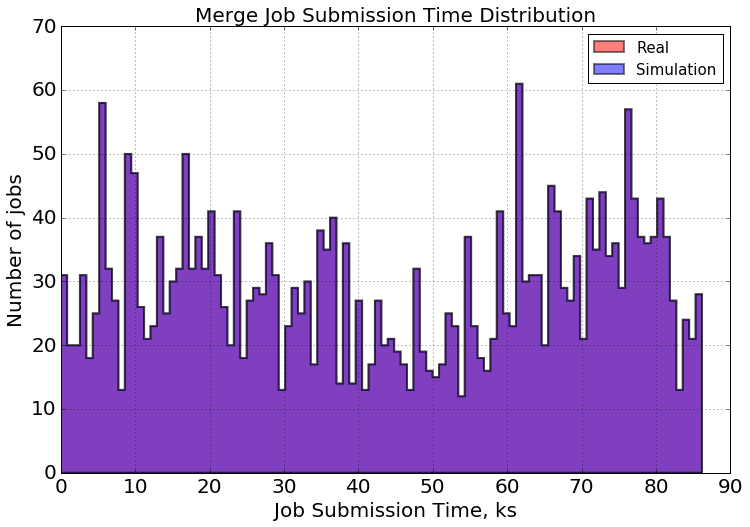

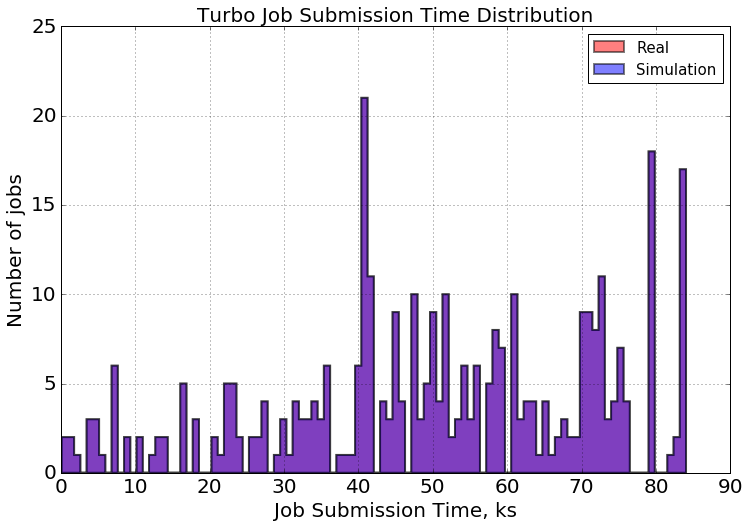

In [7]:
jtp.job_submission_time(by_job_type=True)

### Job Start Execution Time Plot

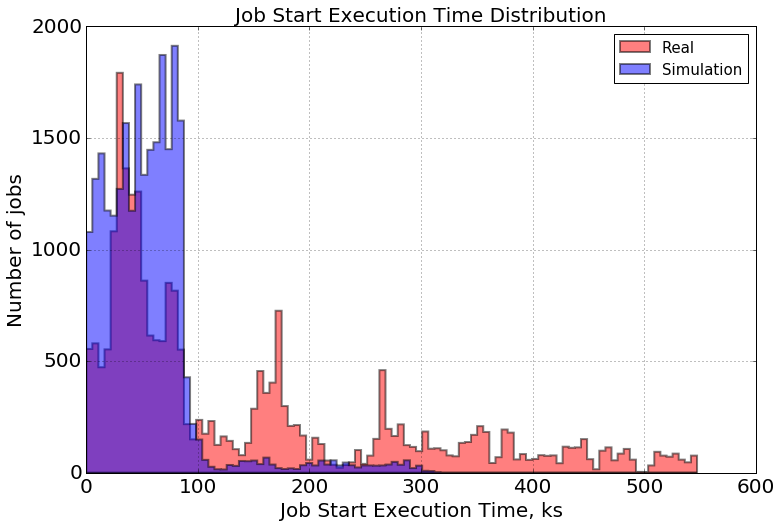

In [8]:
jtp.job_start_exec_time()

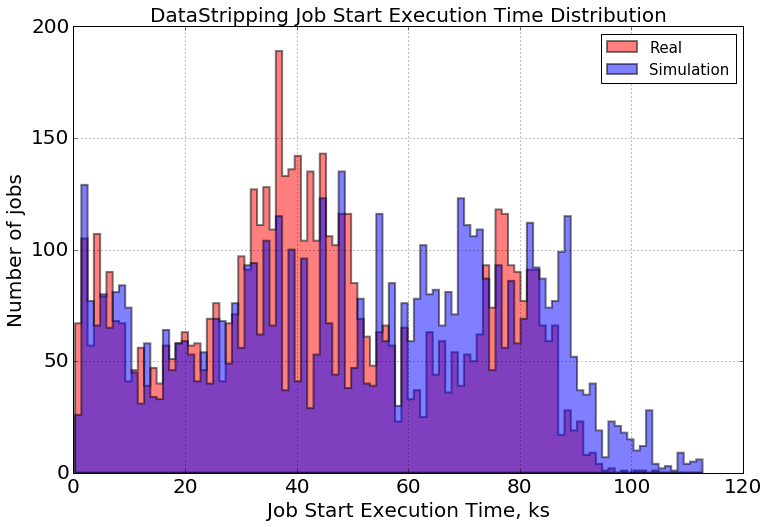

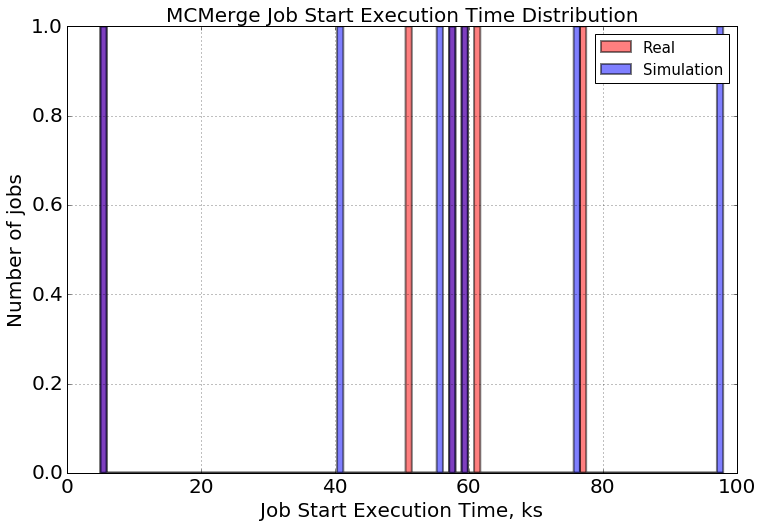

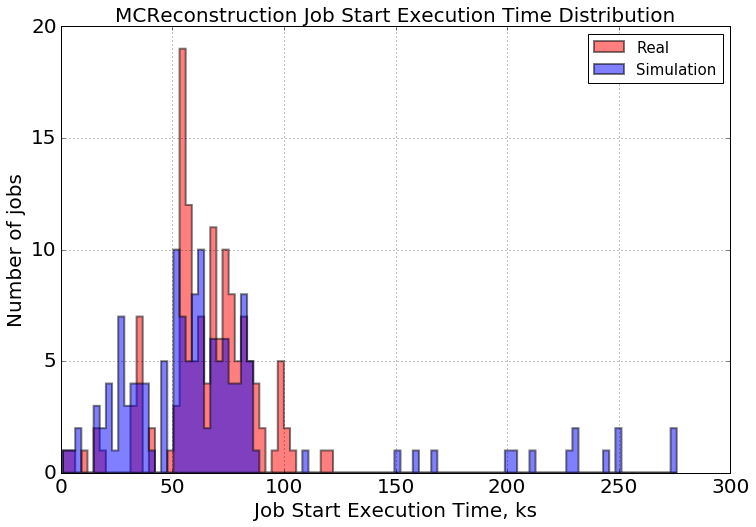

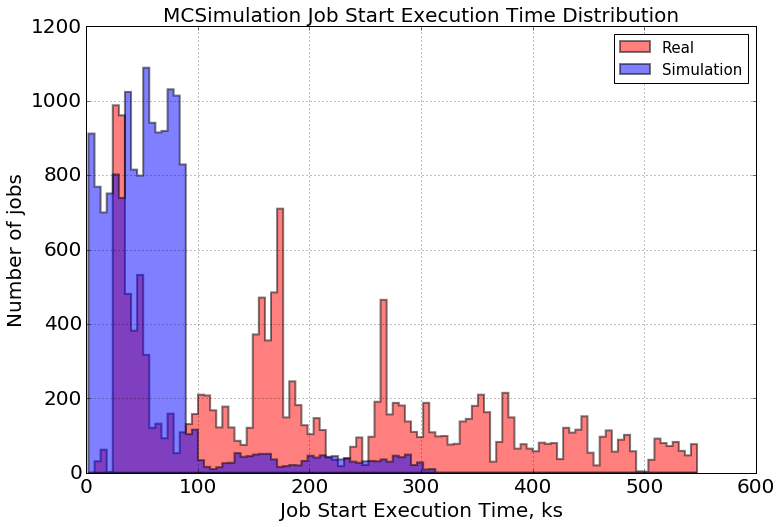

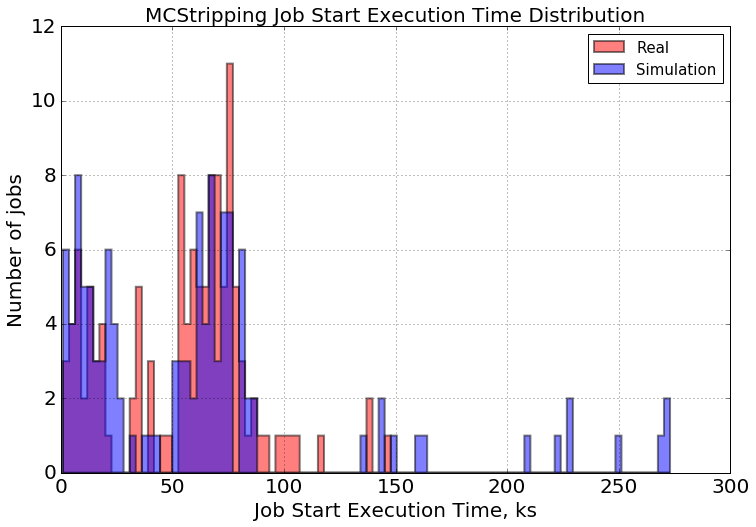

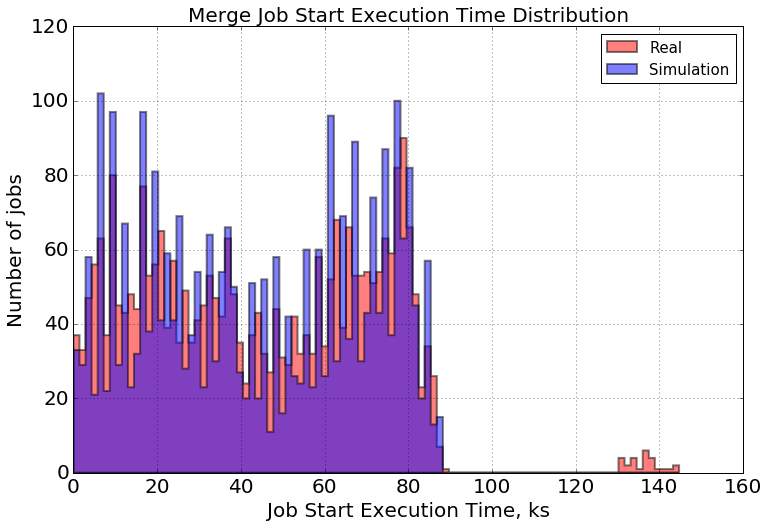

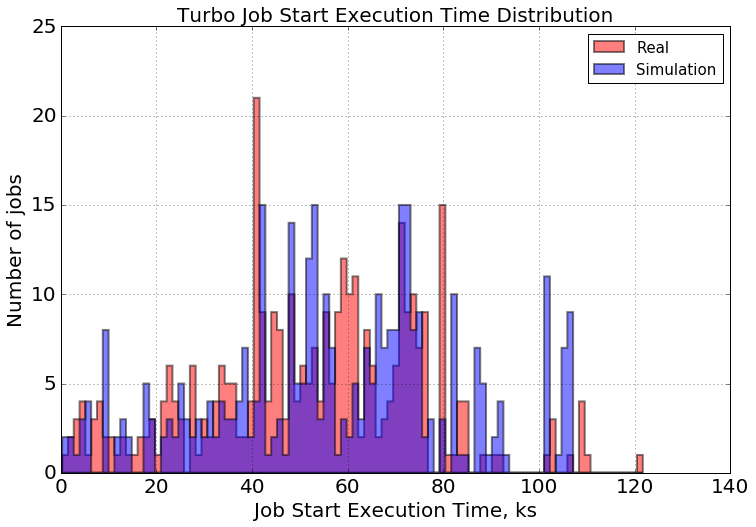

In [9]:
jtp.job_start_exec_time(by_job_type=True)

### Job End Execution Time Plot

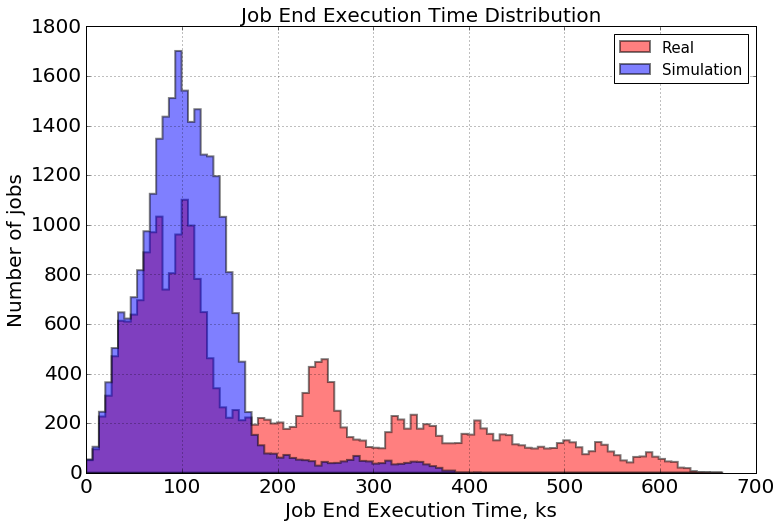

In [10]:
jtp.job_end_exec_time()

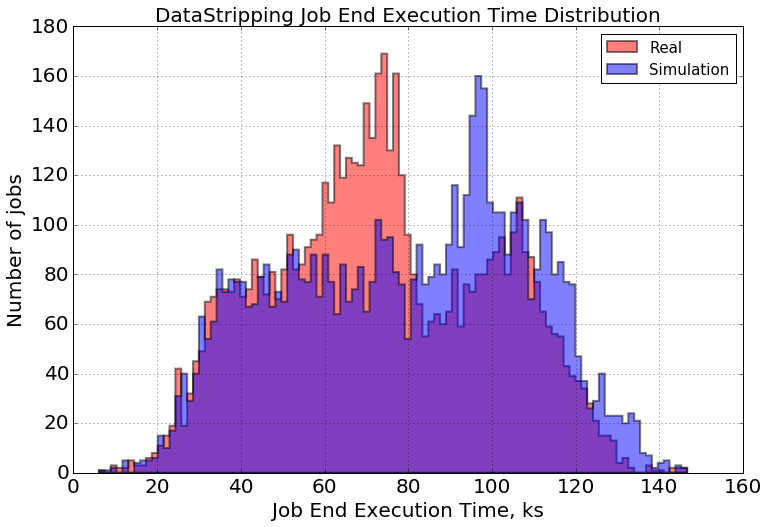

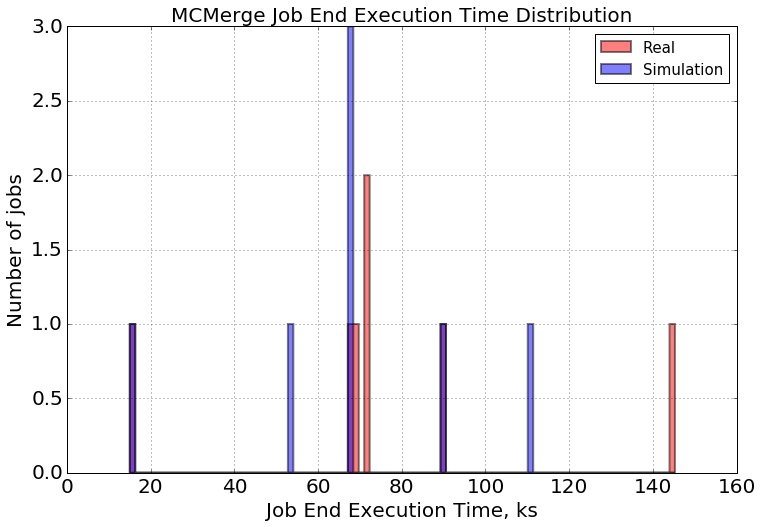

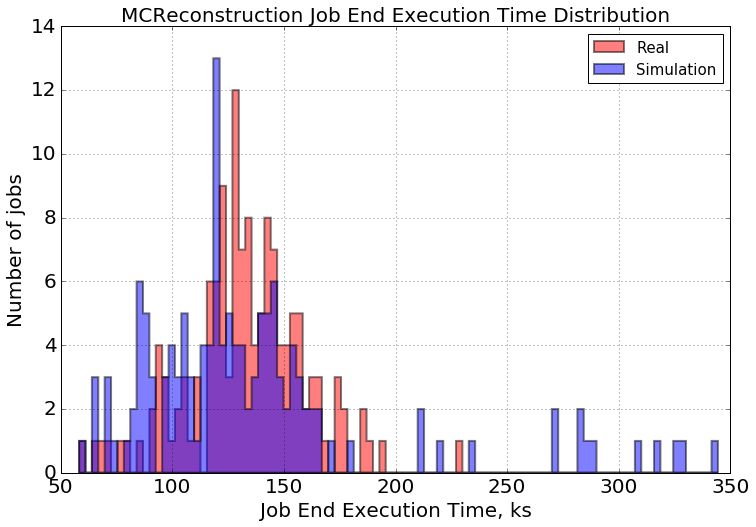

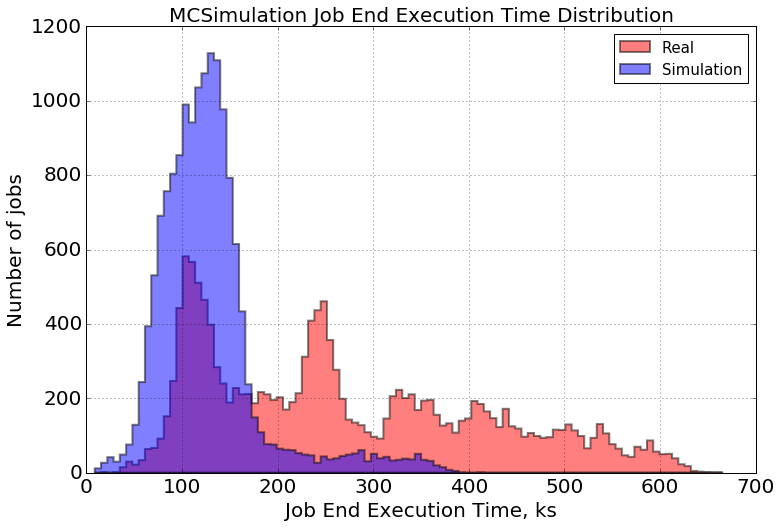

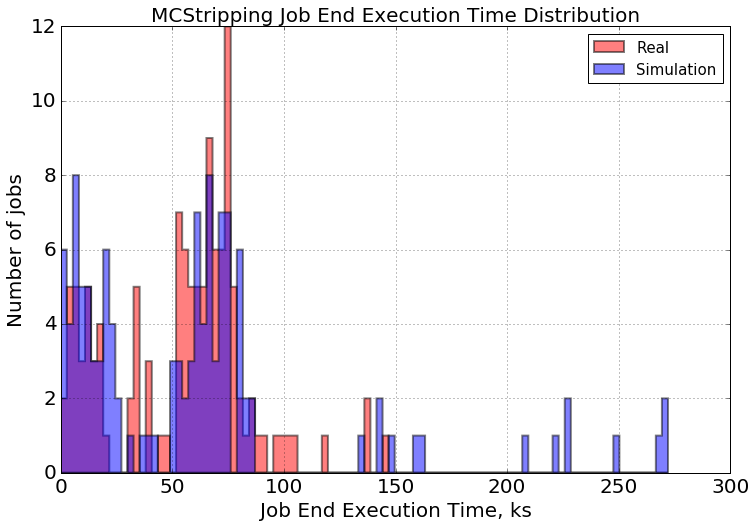

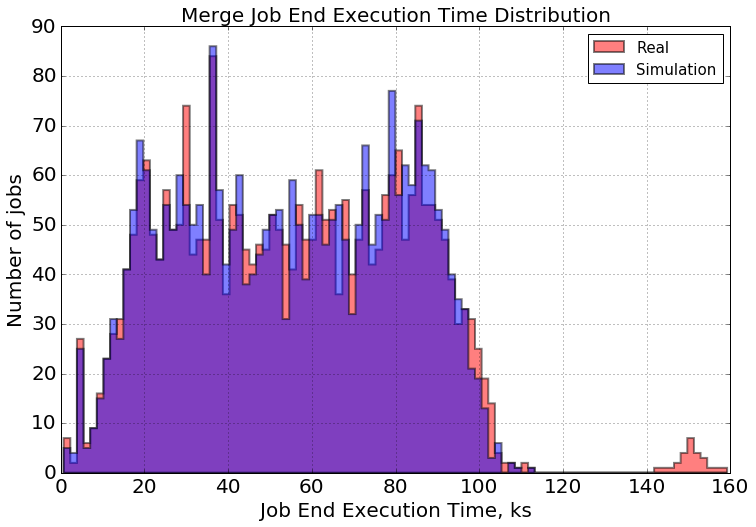

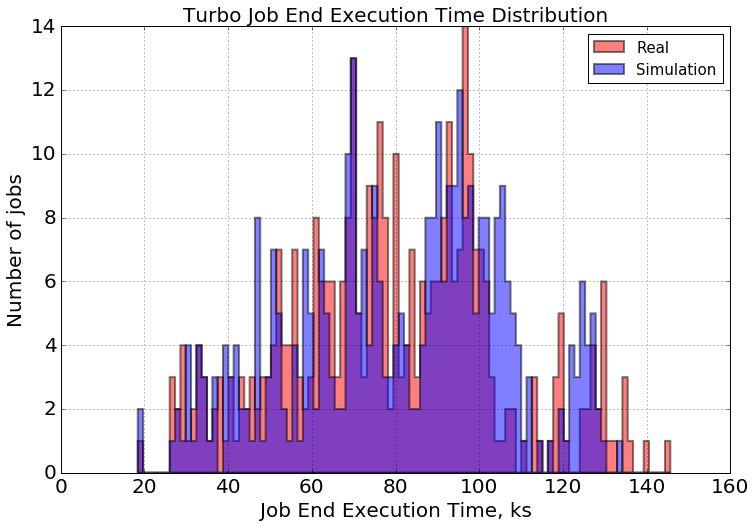

In [11]:
jtp.job_end_exec_time(by_job_type=True)

### Job CPU Time Plot

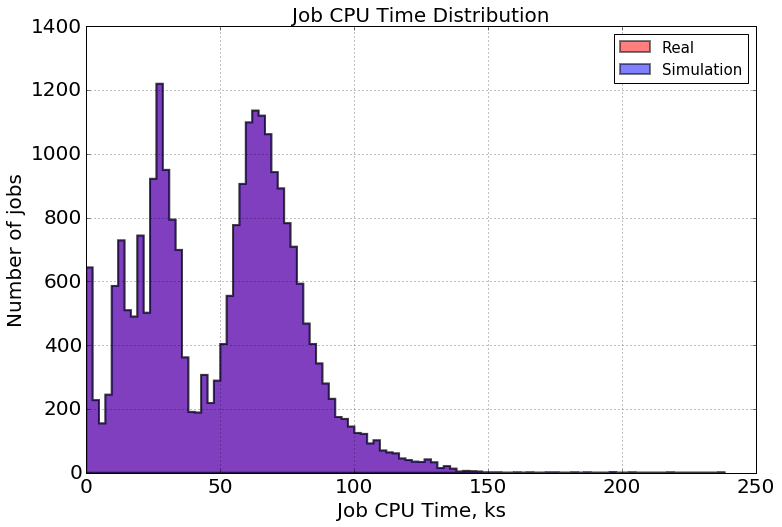

In [12]:
jtp.job_cpu_time()

### Job Execution Time Plots
Job execution time = job end execution time - job start execution time

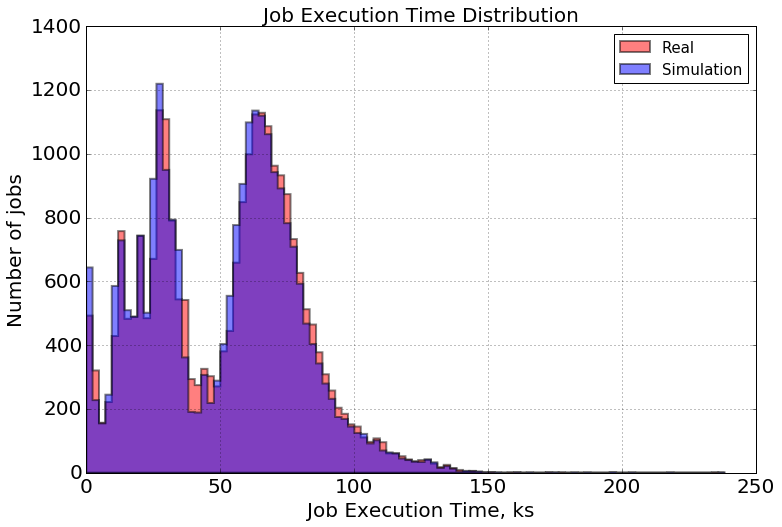

In [13]:
jtp.job_exec_time()

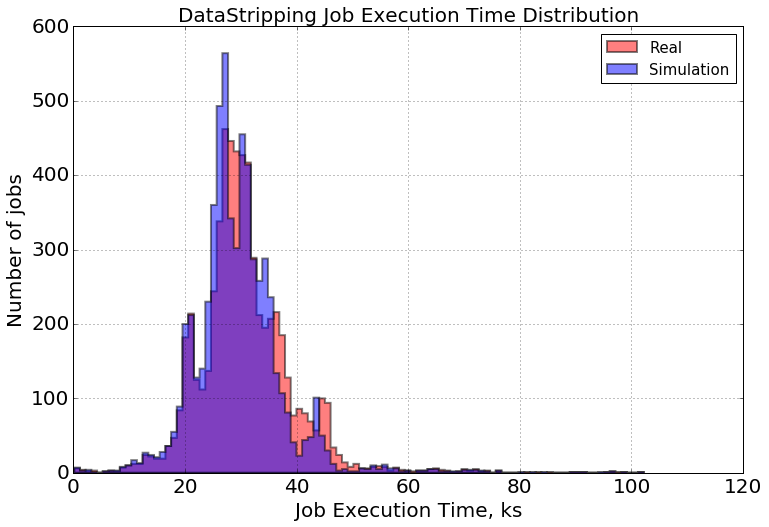

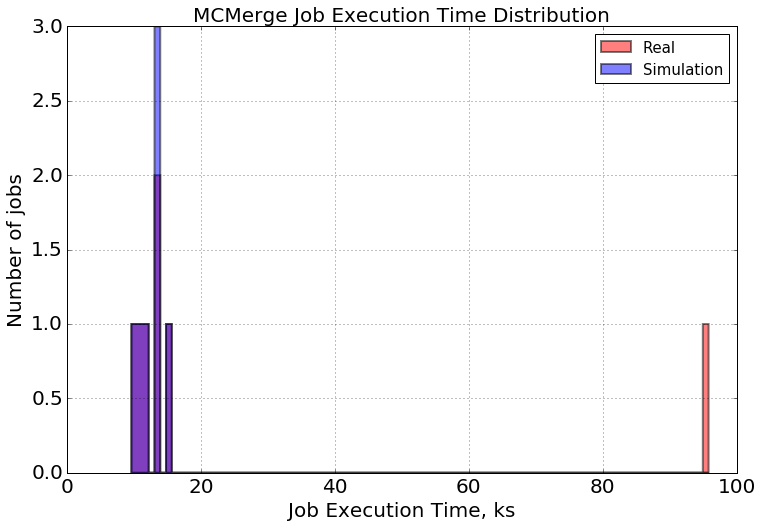

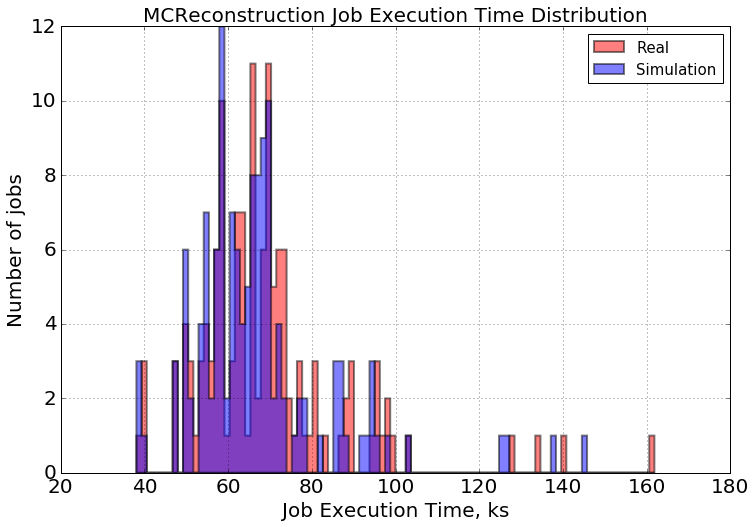

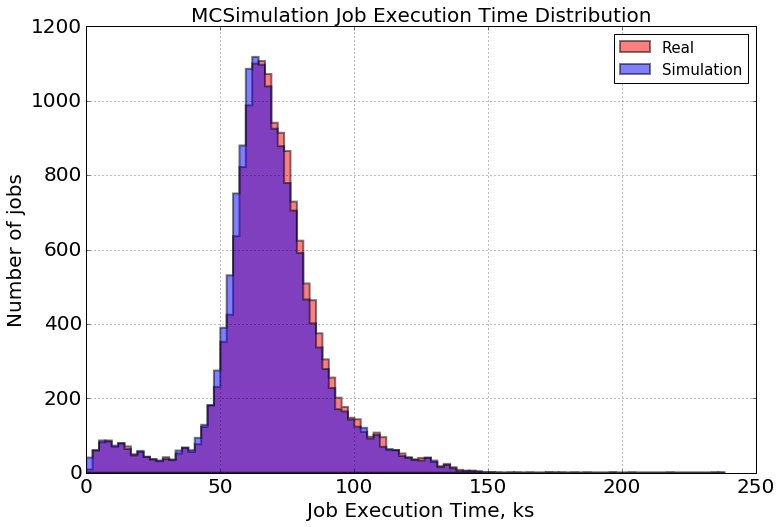

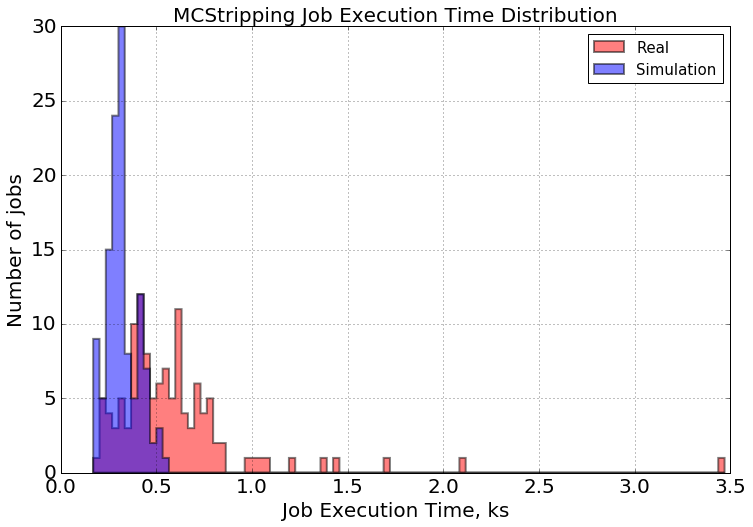

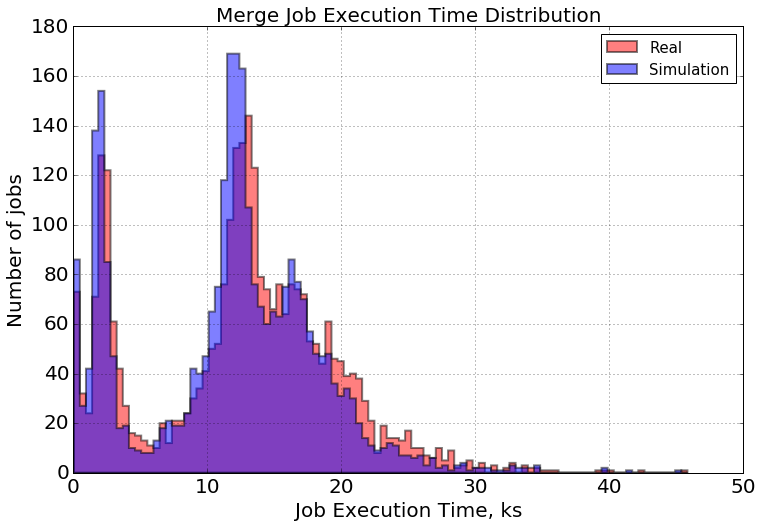

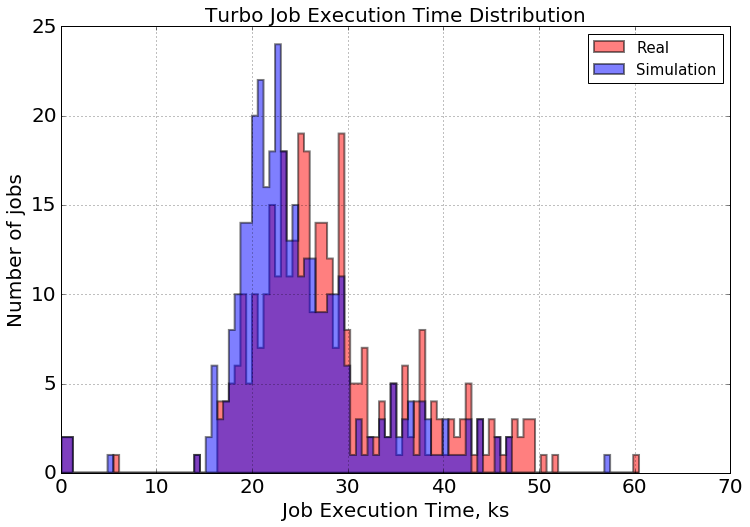

In [14]:
jtp.job_exec_time(by_job_type=True)

### Job Wait Time Plots
Job wait time = job start execution time - job submission time

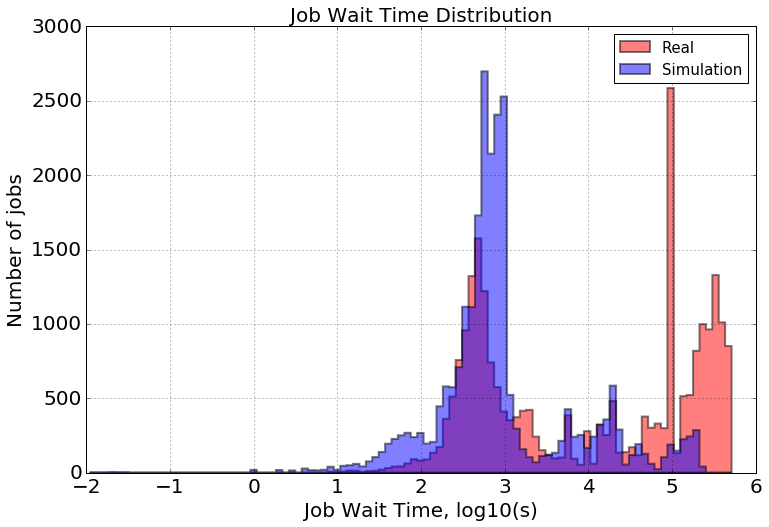

In [15]:
jtp.job_wait_time()

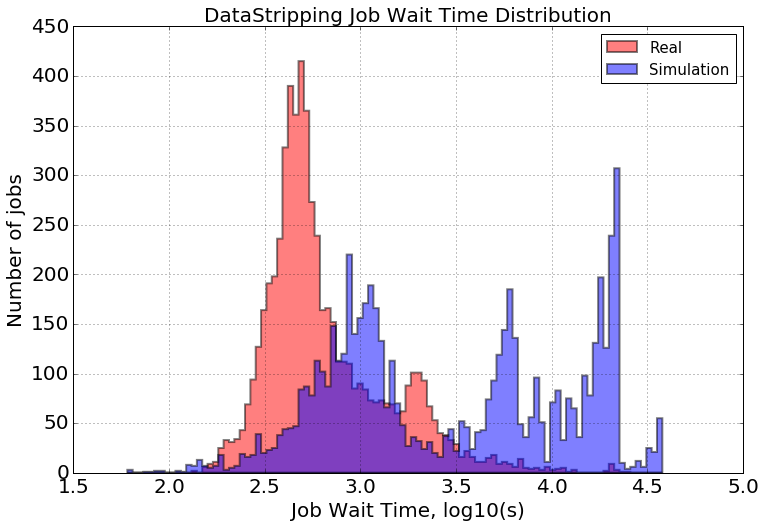

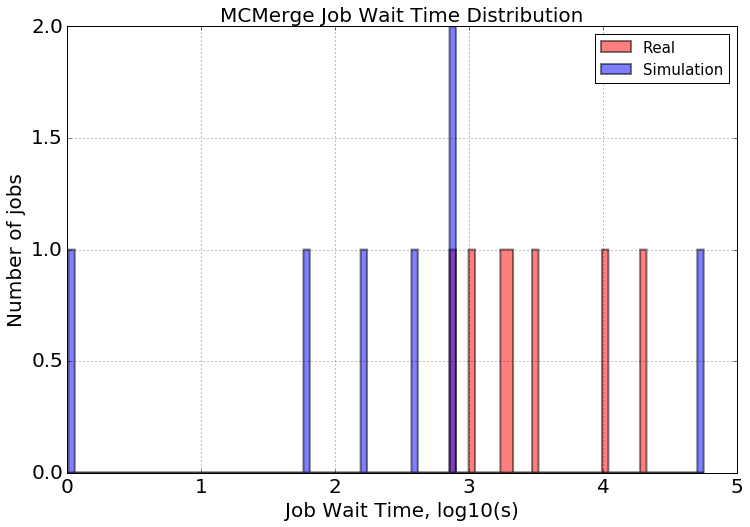

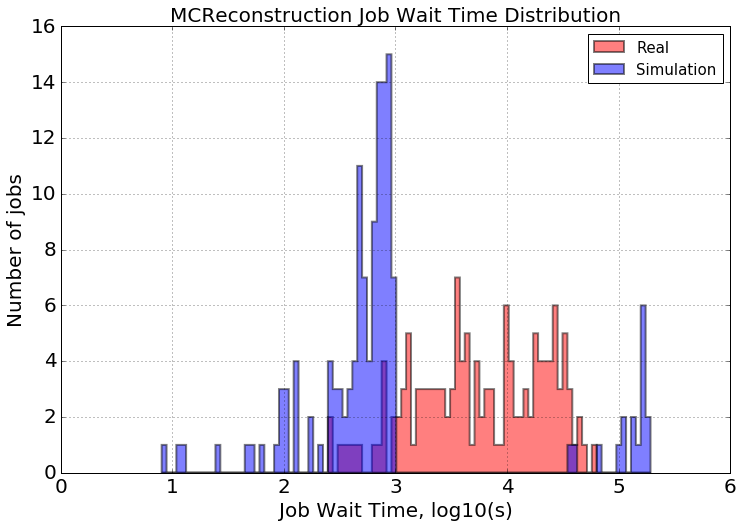

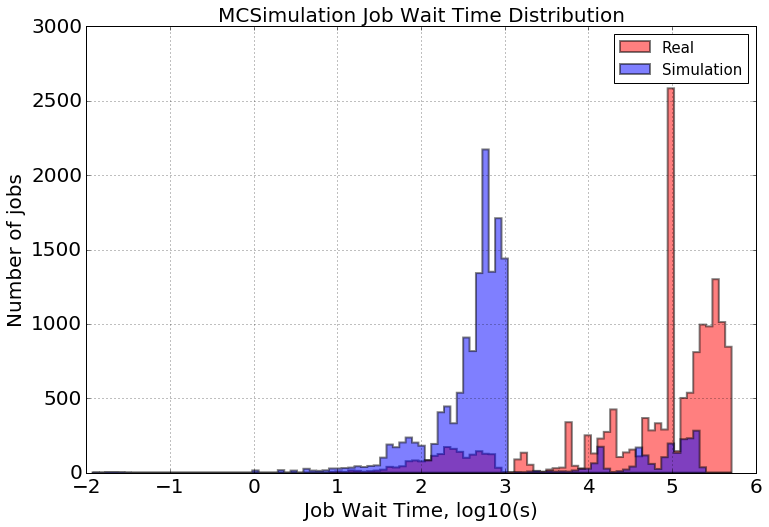

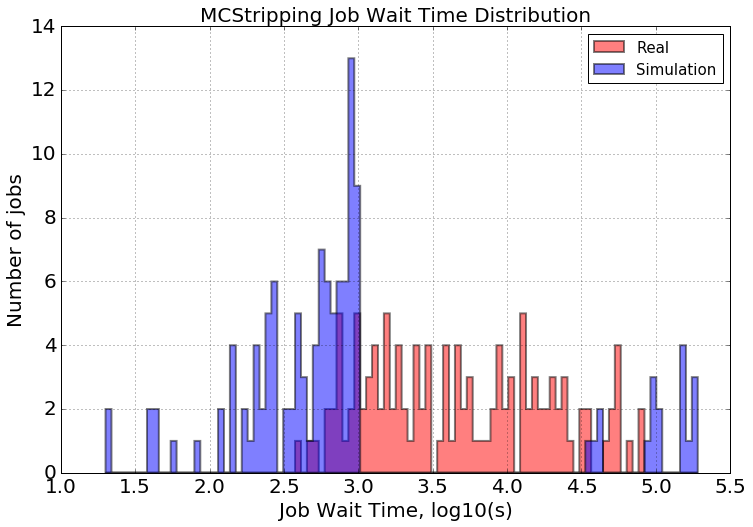

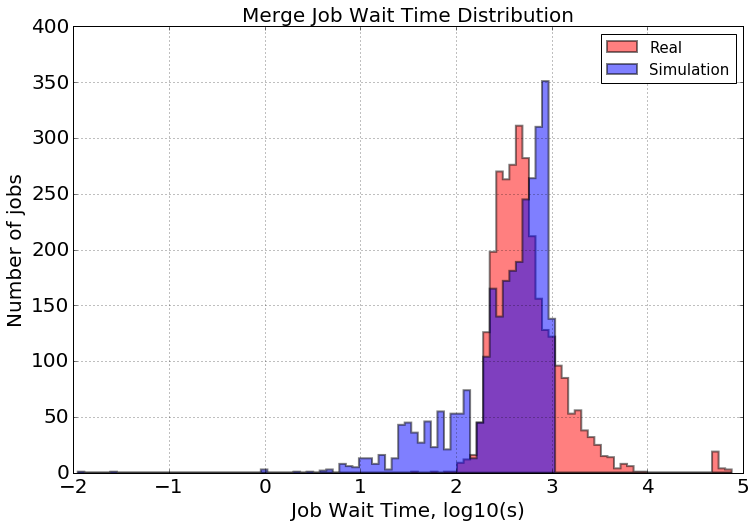

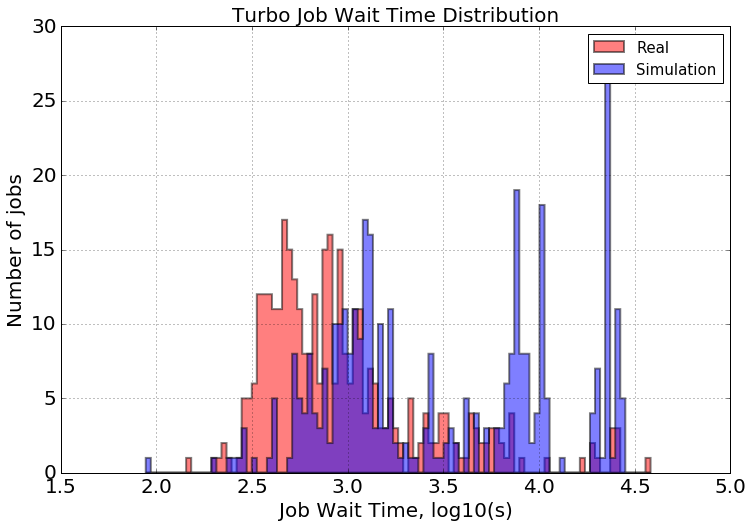

In [16]:
jtp.job_wait_time(by_job_type=True)

### Job Life Time Plots
Job life time = job end execution time - job submission time

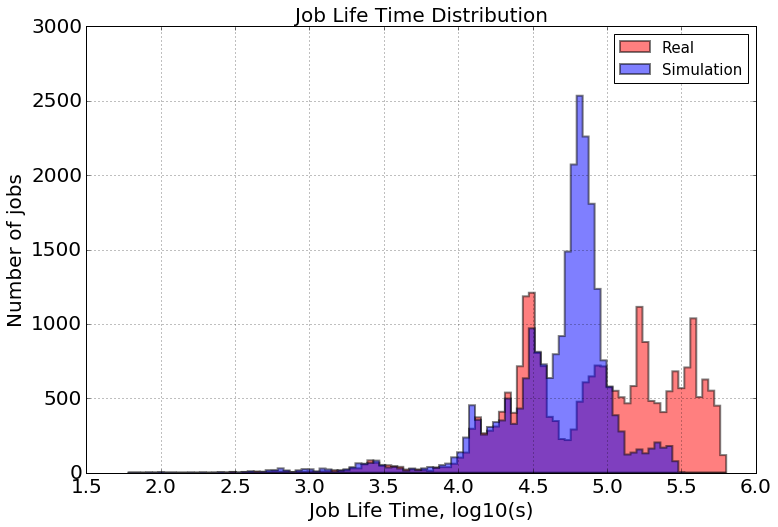

In [17]:
jtp.job_life_time()

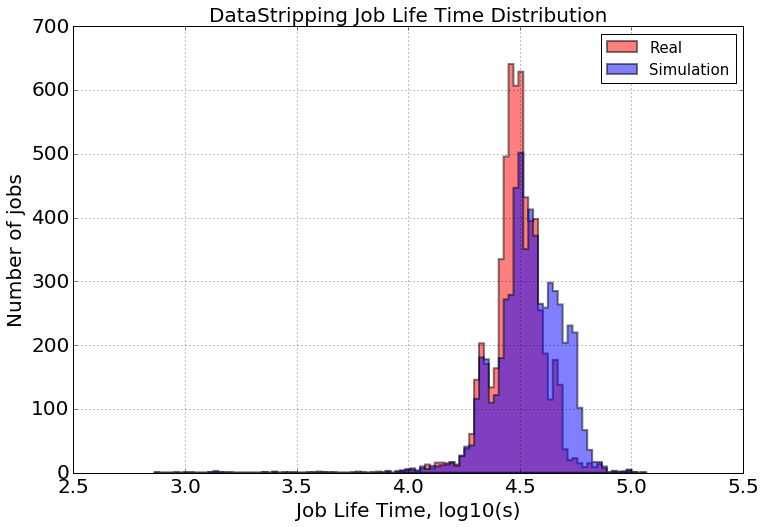

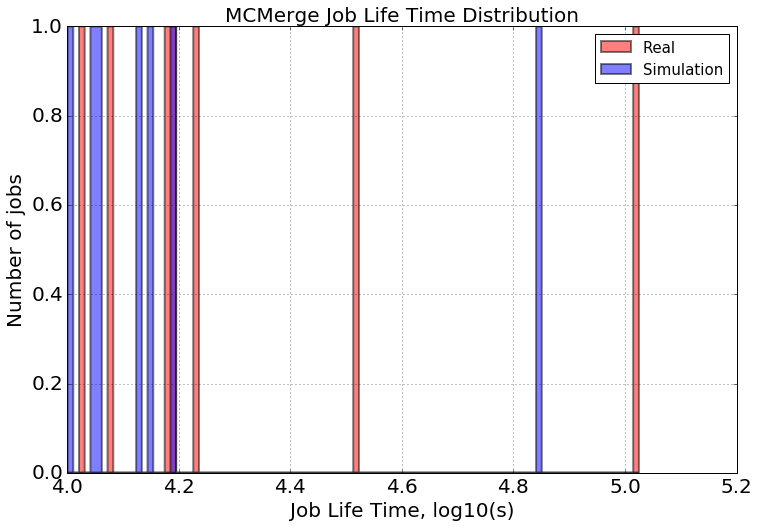

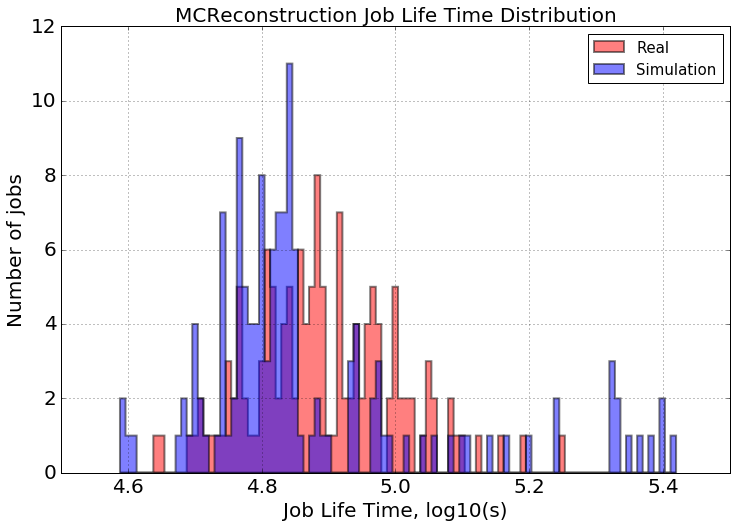

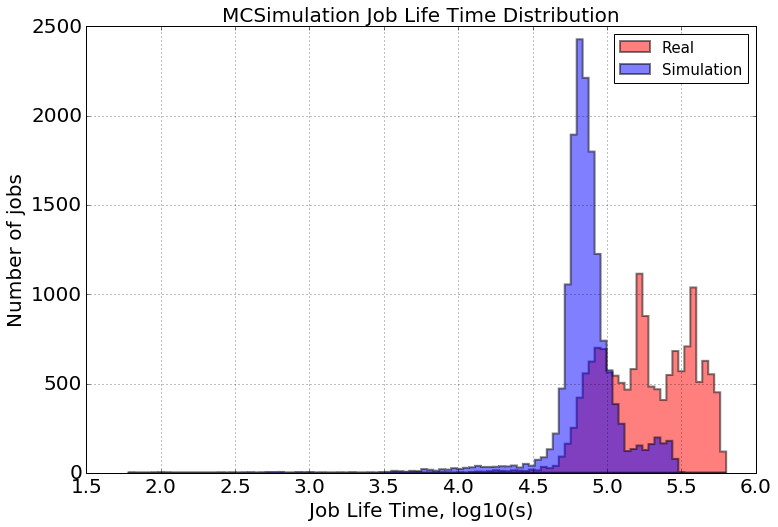

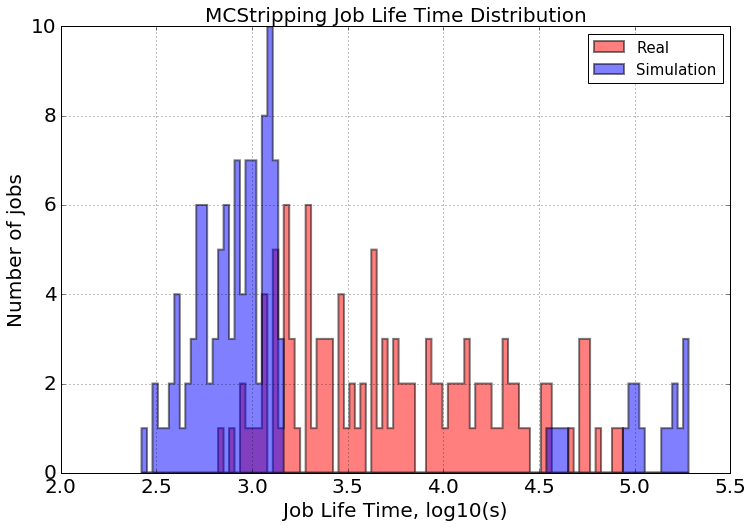

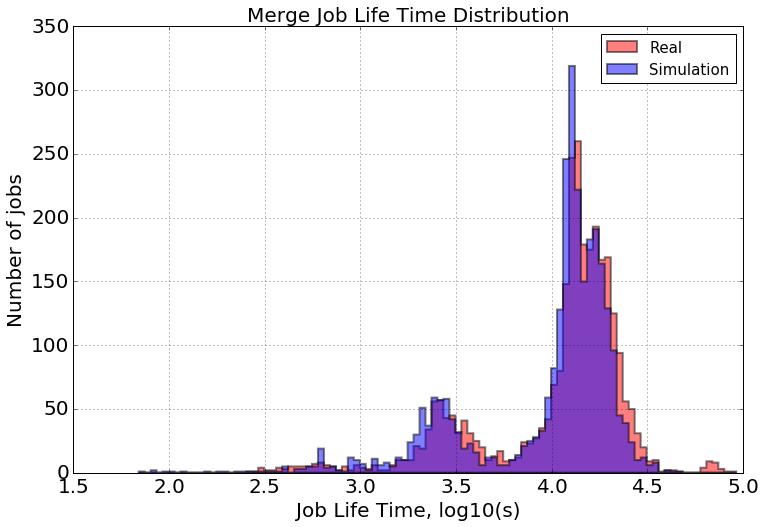

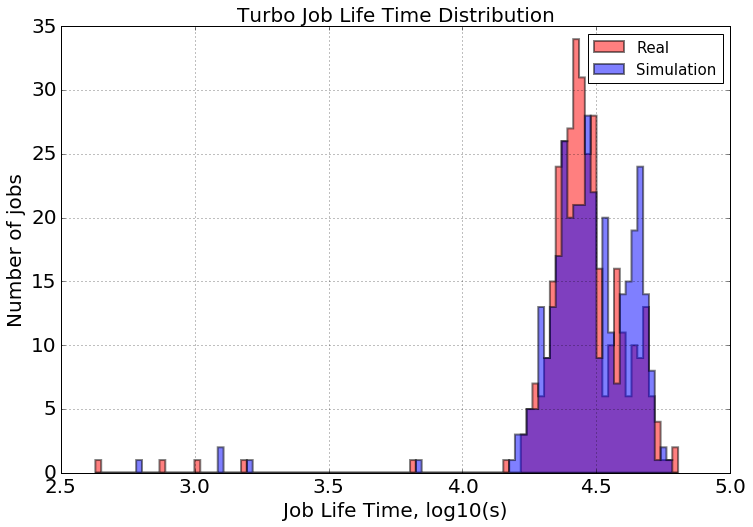

In [18]:
jtp.job_life_time(by_job_type=True)

# Read Simulation Trace Data

In [19]:
sim_trace_data = pandas.read_csv("data/simulation/trace.csv", header=None, sep=', ')
sim_trace_data.columns = ['Nothing', 'Object', 'Variable', 'StartObservTime', 'EndObservTime', 'ObservTime', 'VarValue']
sim_trace_data.head(5)

,Nothing,Object,Variable,StartObservTime,EndObservTime,ObservTime,VarValue
0,Variable,3-Tier2_16,bandwidth,0,412274.069519,412274.069519,1000000000
1,Variable,3-Tier2_16,latency,0,412274.069519,412274.069519,0
2,Variable,3-Tier2_16,traffic,0,412274.069519,412274.069519,0
3,Variable,3-Tier2_16,directUserAmount,0,412274.069519,412274.069519,0
4,Variable,3-Tier2_16,indirectUserAmount,0,412274.069519,412274.069519,0


# Traffic Plots

In [21]:
from figures import TrafficPlots
tp = TrafficPlots(sim_trace_data)

### LHCOPN Data Transfer Plots

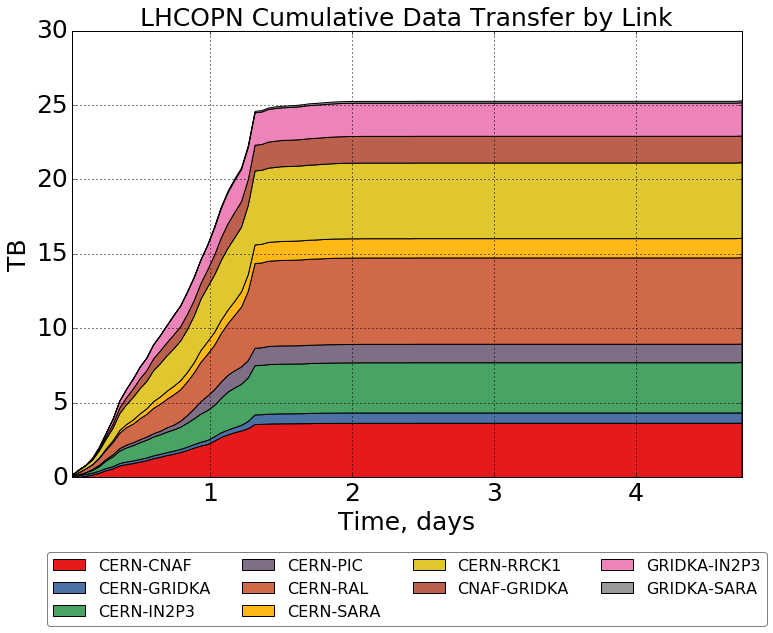

In [22]:
tp.lhcopn_cumulative_data_transfer()

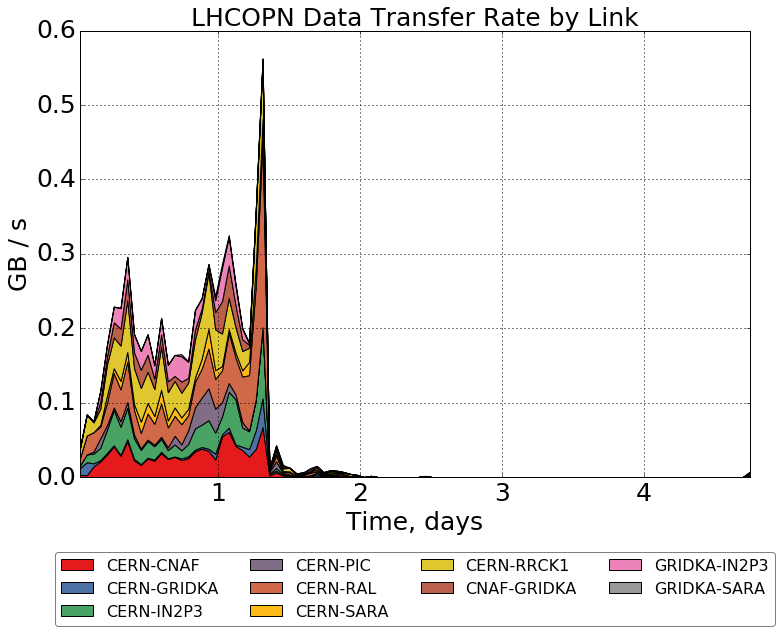

In [23]:
tp.lhcopn_data_transfer_rate()

# Input/Output Data Transfer Plots

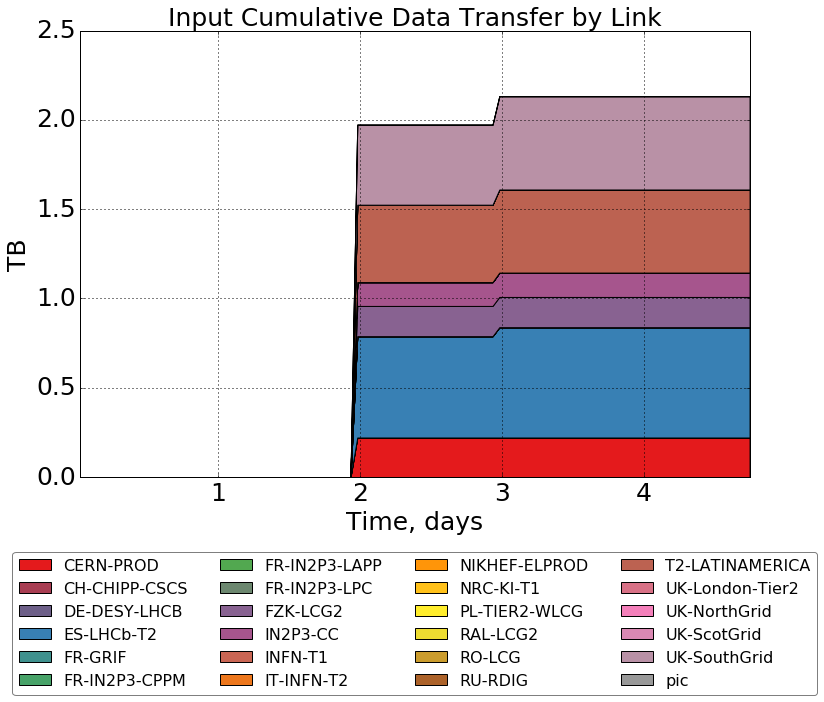

In [24]:
tp.input_cumulative_data_transfer()

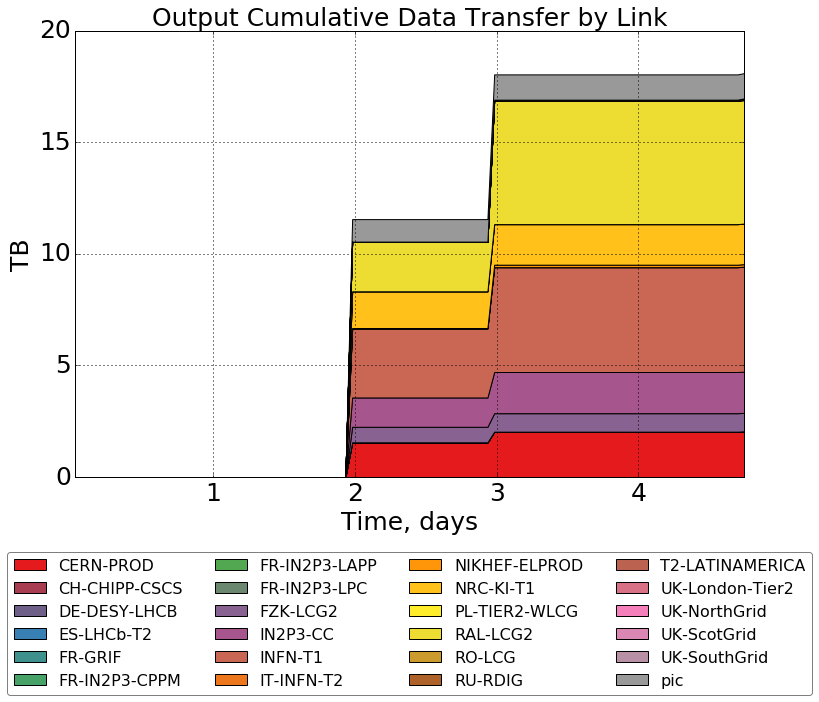

In [25]:
tp.output_cumulative_data_transfer()

# Number of Datasets on Disk/Tape

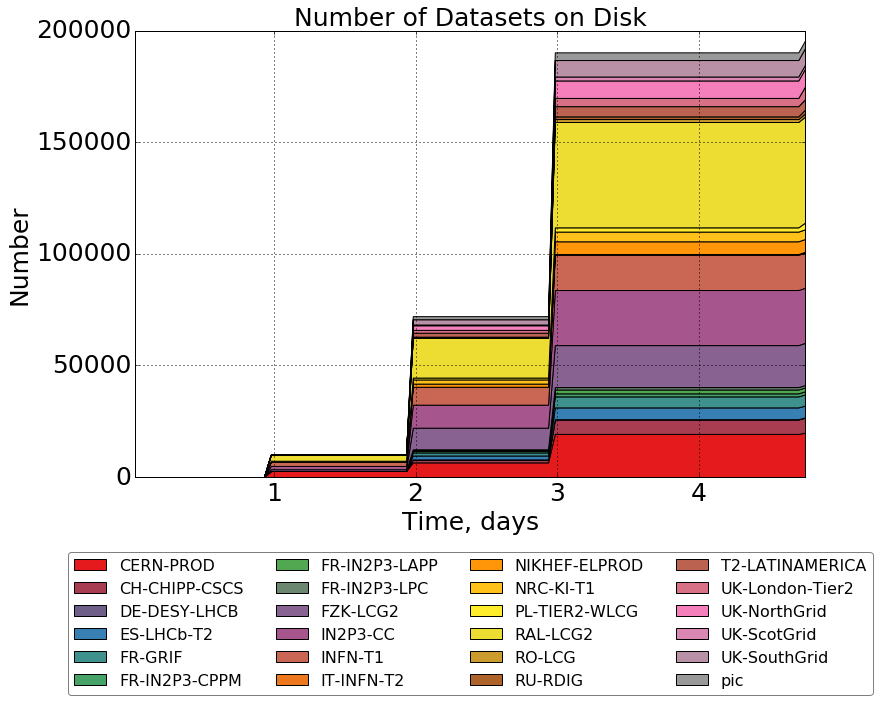

In [26]:
tp.number_of_datasets_ondisk()

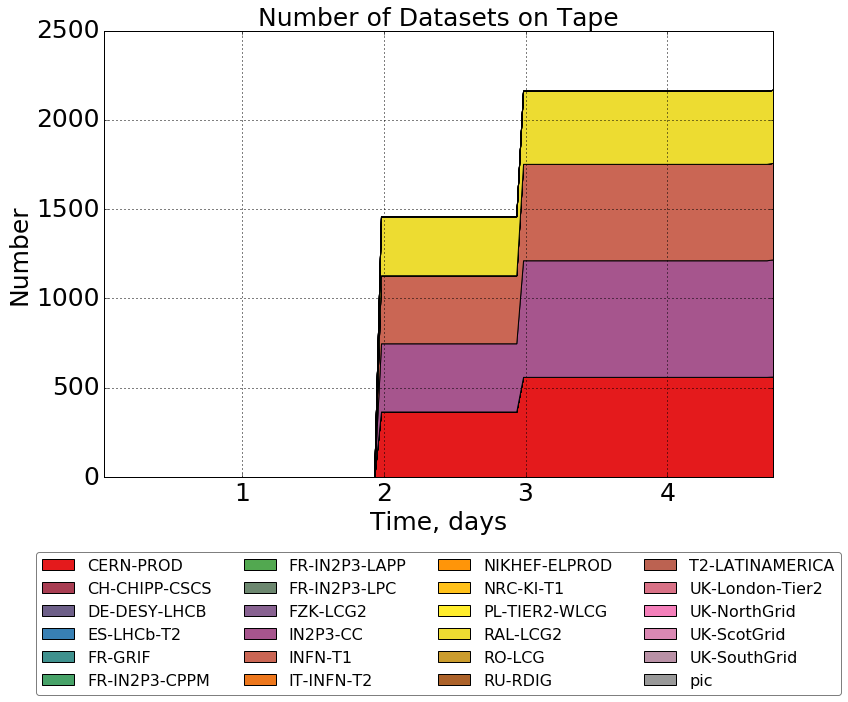

In [27]:
tp.number_of_datasets_ontape()

### Number of Active Cores

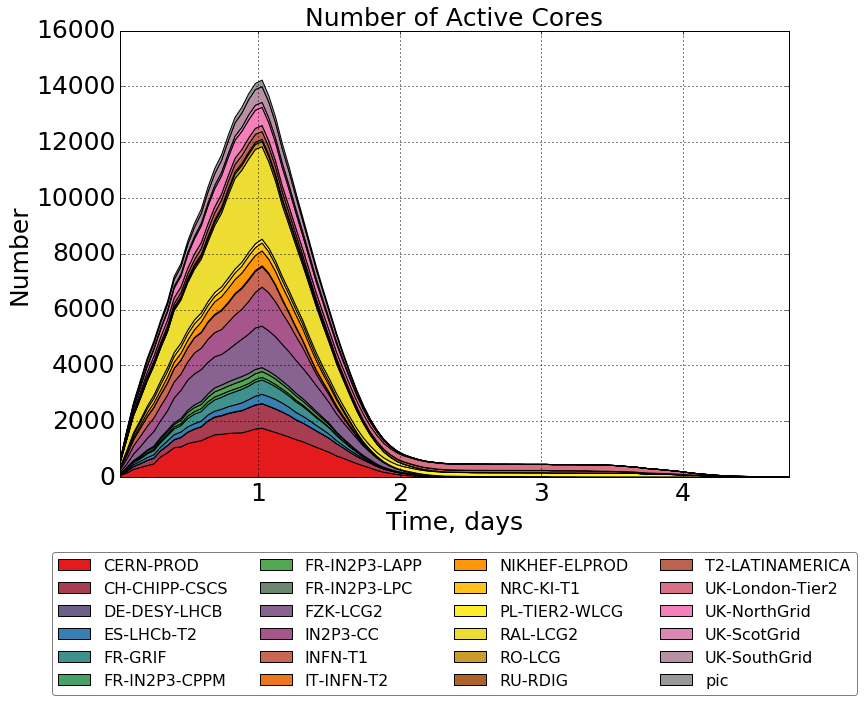

In [29]:
tp.number_of_active_cores()

### Total Data Transfer Plot

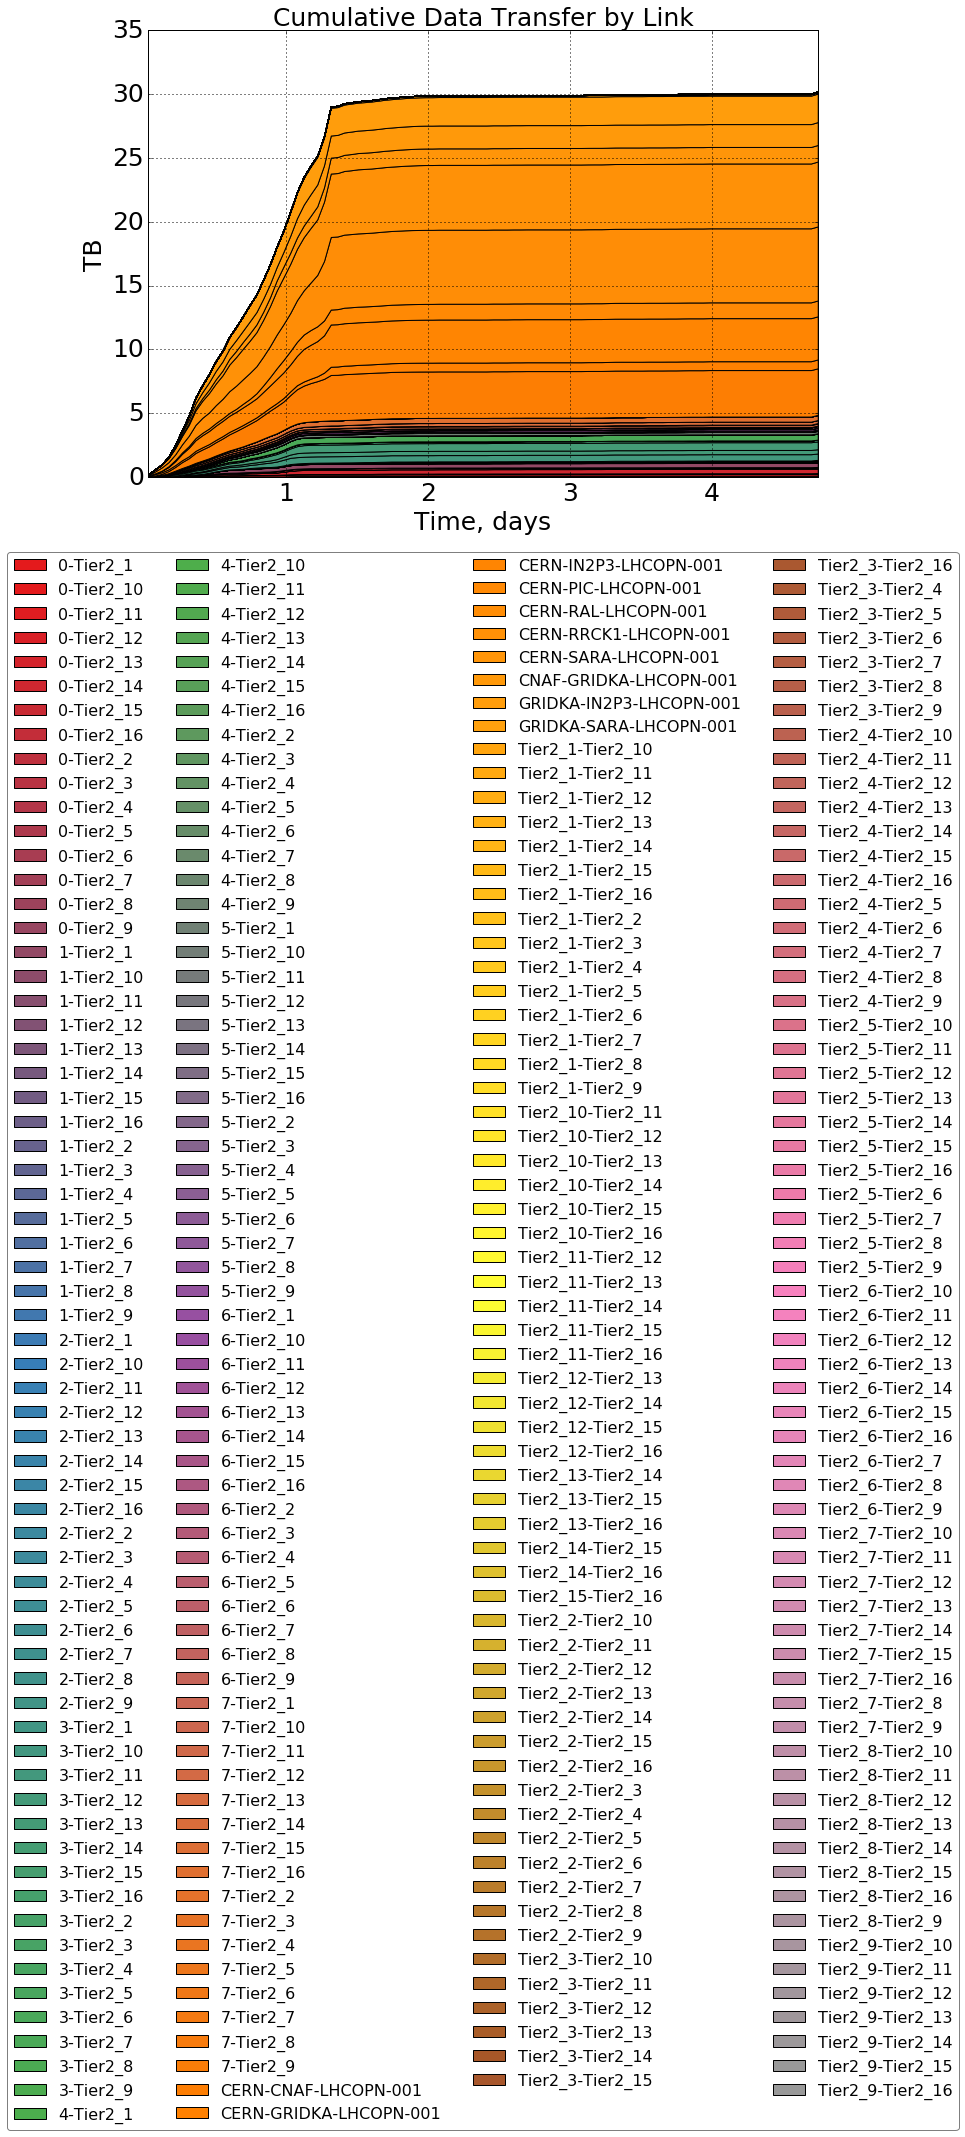

In [28]:
tp.total_cumulative_data_transfer()